In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os
import csv
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:/Users/coa3iz/Documents/Meetup_2610/MeetUp_AutoData.csv')

In [4]:
print('Training data shape: ', df.shape)

Training data shape:  (205, 26)


In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Select symboling as target variable

In [6]:
df.describe(include='all')
x=df
y=df.iloc[:,0]

x=df.iloc[:,1:26]

In [7]:
y.head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: int64

In [8]:
x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
y[:].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

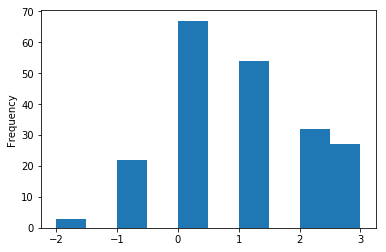

In [10]:
y[:].astype(int).plot.hist();

In [11]:
x=x.replace('?', np.nan)

In [12]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values = missing_values_table(x)
missing_values.head()

Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
normalized-losses,41,20.0
bore,4,2.0
stroke,4,2.0
price,4,2.0
num-of-doors,2,1.0


In [14]:
x['normalized-losses']=x['normalized-losses'].astype(str).astype(float)
x['bore']=x['bore'].astype(str).astype(float)
x['stroke']=x['stroke'].astype(str).astype(float)
x['price']=x['price'].astype(str).astype(float)
x['horsepower']=x['horsepower'].astype(str).astype(float)
x['peak-rpm']=x['peak-rpm'].astype(str).astype(float)
x=x.fillna(x.mean())
x = x.fillna(df['num-of-doors'].value_counts().index[0])

In [15]:
missing_values = missing_values_table(x)
missing_values.head()

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [16]:
x.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,116,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [17]:
x.dtypes.value_counts()

float64    11
object     10
int64       5
dtype: int64

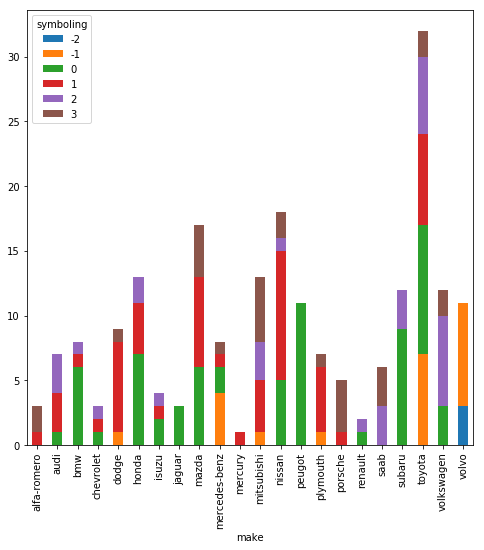

In [18]:
make_symboling_table = pd.crosstab(index=x["make"], 
                          columns=x["symboling"])


make_symboling_table .plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

Jaguar, porsche, peugeot, volvo are good for selection

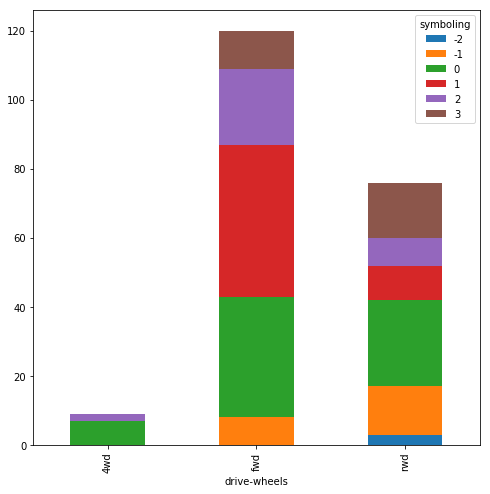

In [19]:
make_symboling_table = pd.crosstab(index=x["drive-wheels"], 
                          columns=x["symboling"])
make_symboling_table .plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

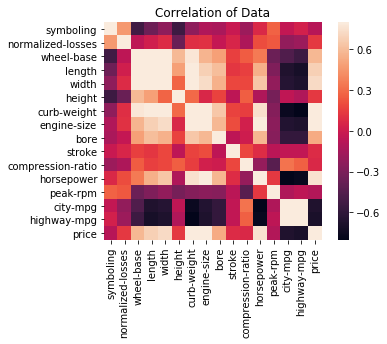

In [20]:
data_corr = x.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

In [21]:
data_corr['symboling'].sort_values(ascending=False)

symboling            1.000000
normalized-losses    0.465190
peak-rpm             0.273679
horsepower           0.071389
highway-mpg          0.034606
stroke              -0.008689
city-mpg            -0.035823
price               -0.082201
engine-size         -0.105790
bore                -0.130083
compression-ratio   -0.178515
curb-weight         -0.227691
width               -0.232919
length              -0.357612
wheel-base          -0.531954
height              -0.541038
Name: symboling, dtype: float64

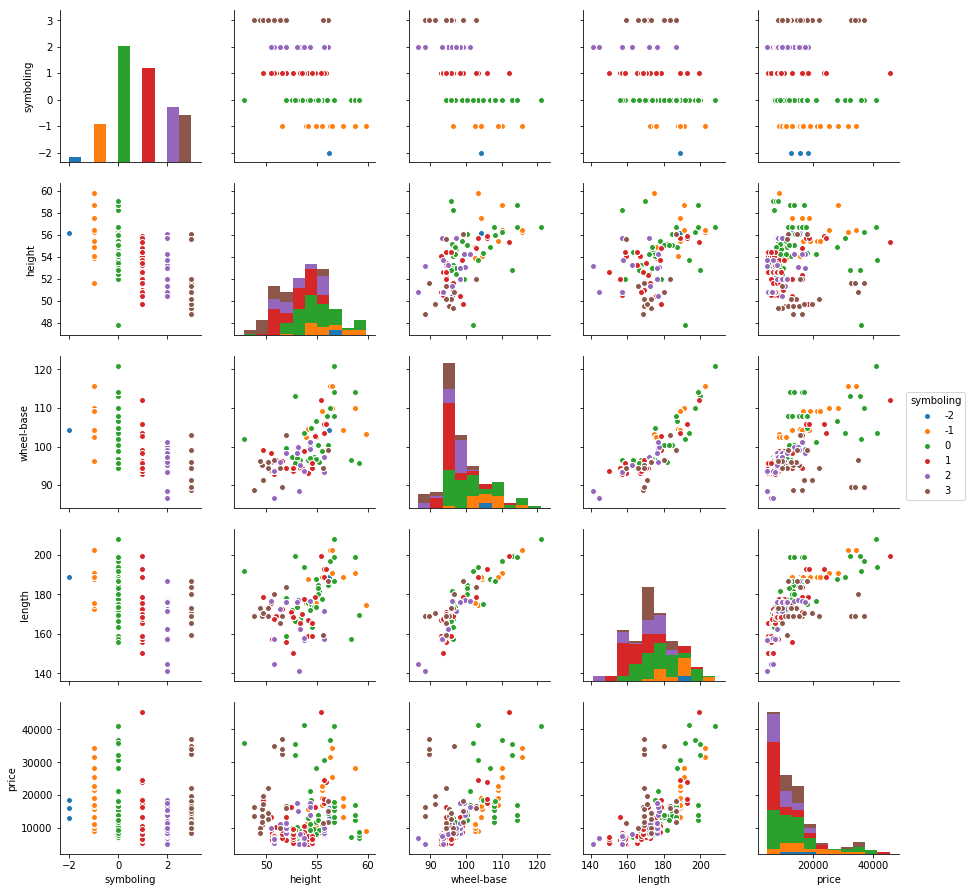

In [22]:
a=x[['symboling','height','wheel-base','length','price']]
sns.pairplot(a, hue='symboling', size=2.5);

In [23]:
x.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          7
num-of-cylinders     7
fuel-system          8
dtype: int64

In [24]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in x:
    if x[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(x[col].unique())) <= 2:
            # Train on the training data
            le.fit(x[col])
            # Transform both training and testing data
            x[col] = le.transform(x[col])
                        
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [25]:
x = pd.get_dummies(x)

print('Training Features shape: ', x.shape)

Training Features shape:  (205, 72)


In [26]:
x.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-ty

In [27]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [28]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)
print(x_test)

[[0.6        0.20418848 1.         ... 0.         0.         0.        ]
 [0.2        0.29842932 1.         ... 1.         0.         0.        ]
 [0.8        0.29842932 1.         ... 1.         0.         0.        ]
 ...
 [0.6        0.27748691 1.         ... 0.         0.         0.        ]
 [0.6        0.29842932 1.         ... 1.         0.         0.        ]
 [0.6        0.29842932 1.         ... 0.         0.         0.        ]]


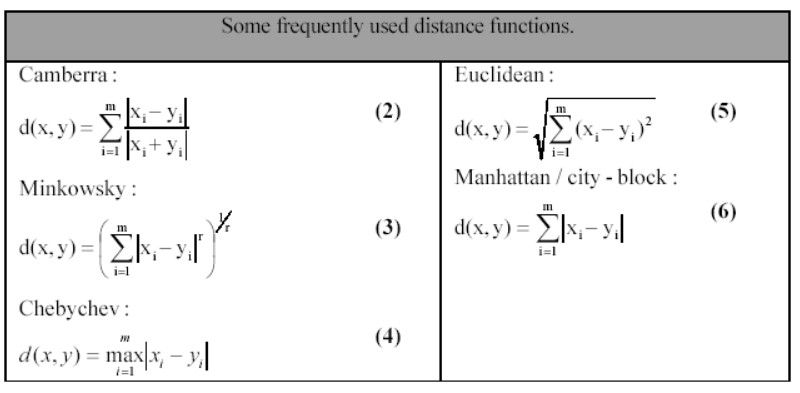

In [29]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y_pred = classifier.predict(x_test)  

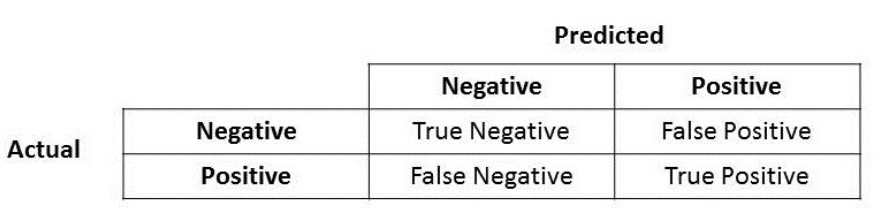


Accuracy = TP+TN/TP+FP+FN+TN

Precision (PPV) - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

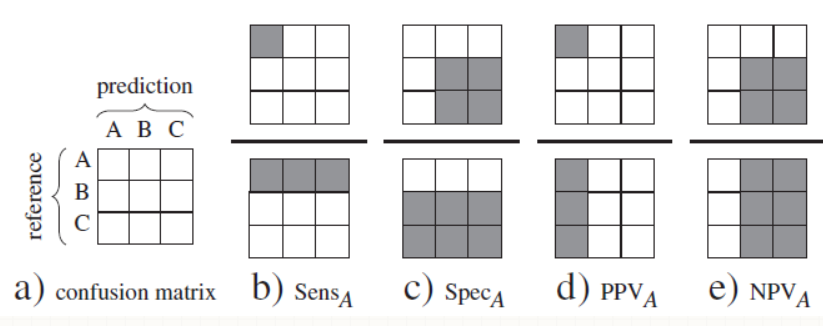

In [31]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  



print(classification_report(y_test, y_pred)) 

[[1 1 0 0 0]
 [1 9 2 0 0]
 [0 2 7 0 1]
 [0 1 3 5 1]
 [0 0 3 2 2]]
             precision    recall  f1-score   support

         -1       0.50      0.50      0.50         2
          0       0.69      0.75      0.72        12
          1       0.47      0.70      0.56        10
          2       0.71      0.50      0.59        10
          3       0.50      0.29      0.36         7

avg / total       0.60      0.59      0.58        41



In [32]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

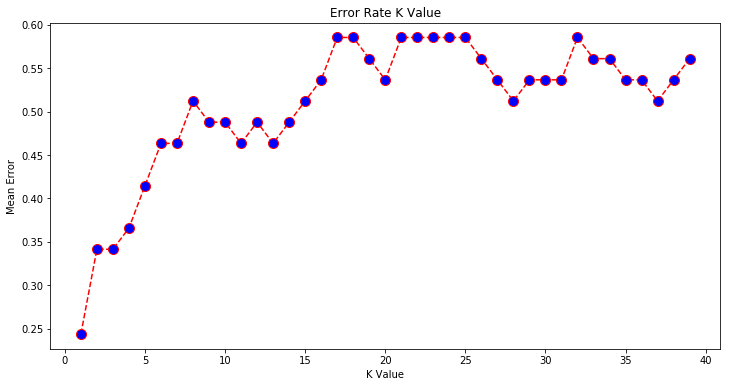

In [33]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

             precision    recall  f1-score   support

         -1       0.40      1.00      0.57         2
          0       1.00      0.58      0.74        12
          1       0.57      0.80      0.67        10
          2       0.70      0.70      0.70        10
          3       0.60      0.43      0.50         7

avg / total       0.72      0.66      0.66        41



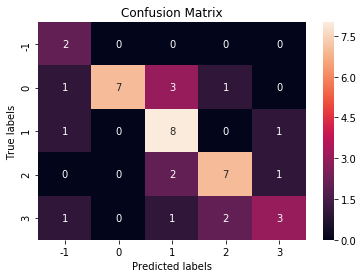

In [34]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)  
from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred)) 

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['-1', '0','1','2','3']); ax.yaxis.set_ticklabels(['-1', '0','1','2','3']);

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

x2=x[['price','height','make_peugot','make_volvo','make_subaru','normalized-losses','wheel-base']]
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import precision_score

PS=0
for w in range (0,20):
    x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.20)
    scaler = MinMaxScaler()  
    scaler.fit(x2)
    x2_train = scaler.transform(x2_train)  
    x2_test = scaler.transform(x2_test) 

    clf = KNeighborsClassifier(n_neighbors = 3)
    cm=confusion_matrix(y_test, y_pred)
    classifier.fit(x2_train, y_train)
    y_pred = classifier.predict(x2_test)
    PS=precision_score(y_test, y_pred, average='macro')+PS
    
    
PS=PS/20
from sklearn.metrics import classification_report, confusion_matrix  
print(cm)  
print ('Average precision: %0.2f' % PS)
print(classification_report(y_test, y_pred)) 

[[0 0 0 0 0 0]
 [0 0 1 0 2 1]
 [0 1 7 1 2 3]
 [2 2 3 5 2 0]
 [0 2 2 0 0 1]
 [0 0 1 1 1 1]]
Average precision: 0.77
             precision    recall  f1-score   support

         -1       0.67      1.00      0.80         4
          0       0.67      0.71      0.69        14
          1       0.85      0.79      0.81        14
          2       0.75      0.60      0.67         5
          3       1.00      0.75      0.86         4

avg / total       0.77      0.76      0.76        41



C:\Users\coa3iz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


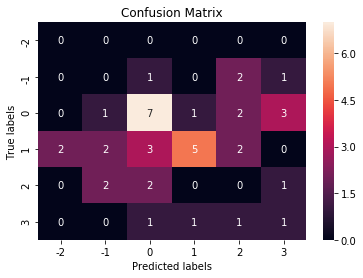

In [144]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['-2','-1', '0','1','2','3']); ax.yaxis.set_ticklabels(['-2','-1', '0','1','2','3']);